In [5]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R

In [6]:
data = read_csv.read_csv(r"/Users/alex/Desktop/Fabry-Perot/data/InGaN_FTIR.csv") #MacOS
#data = read_csv.read_csv(r"C:\Users\ge85rek\Desktop\Fabry-Perot\data\InGaN_FTIR.csv") #Labor
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0][::-1]) * 100
wavelength = scipy.constants.c/frequenz

In [7]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    end = (np.abs(array - value)).argmin()
    return end

def flatten(data, N = 1200, cutdown = None, cutup = None):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[cutdown:cutup], data[cutdown:cutup]-smooth[cutdown:cutup]

def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

def calculate_m(min_frequenz_array):
    m_array = []
    for i in range(0,len(min_frequenz_array)-1):
        m_array.append(min_frequenz_array[i]/(min_frequenz_array[i+1]-min_frequenz_array[i]))
    return m_array

def polynomial(x,a0,a1,a2,a3,a4):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4

def sine(x,k,A):
    return A*np.sin(k*x)

def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

In [8]:
cutdown = find_nearest(frequenz, 0.9e14)
cutup = find_nearest(frequenz, 2.0e14)
frequenz_20_cut = frequenz[cutdown:cutup]

In [9]:
data_J130828_20 = data[8][::-1][cutdown:cutup]

In [10]:
J13_20_smooth, J13_smoothed_out = flatten(data_J130828_20, N = 1200)

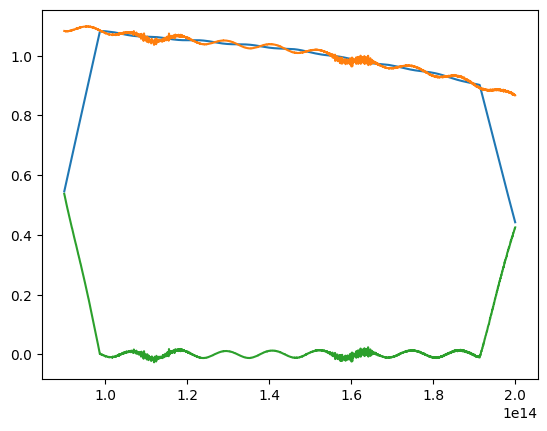

In [11]:
plt.plot(frequenz_20_cut, J13_20_smooth)
plt.plot(frequenz_20_cut, data_J130828_20)
plt.plot(frequenz_20_cut, J13_smoothed_out)

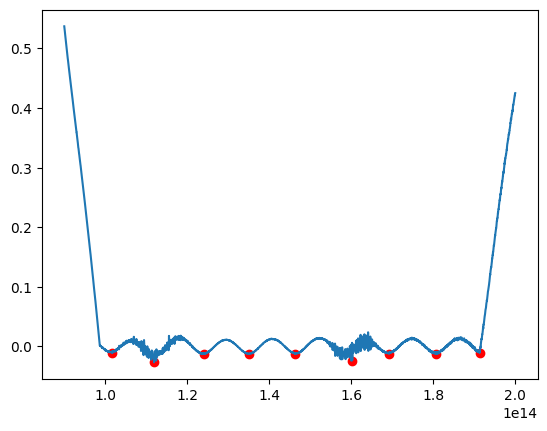

In [12]:
minima_J13_index_20 = scipy.signal.argrelmin(J13_smoothed_out, order = 500)
minima_J13_frequenz_20 = []
minima_J13_absorption_20 = []
for m in minima_J13_index_20[0]:
    minima_J13_frequenz_20.append(frequenz_20_cut[m])
    minima_J13_absorption_20.append(J13_smoothed_out[m])
plt.plot(minima_J13_frequenz_20, minima_J13_absorption_20, 'ro')
plt.plot(frequenz_20_cut, J13_smoothed_out)

In [13]:
minima_J13_index_20

(array([ 811, 1515, 2353, 3124, 3889, 4847, 5482, 6275, 7010]),)

In [14]:
minima_J13_absorption_20

[-0.010499757135833399,
 -0.026771470045000134,
 -0.012633527394166455,
 -0.012551853328333307,
 -0.011999662380000053,
 -0.024178268592500052,
 -0.012114681146666806,
 -0.012656904349999998,
 -0.01064993898333344]

### Deleting unprecise points

In [20]:
minima_J13_absorption_20 = np.delete(minima_J13_absorption_20, [1,5,7])
minima_J13_frequenz_20 = np.delete(minima_J13_frequenz_20, [1,5,7])

IndexError: index 5 is out of bounds for axis 0 with size 4

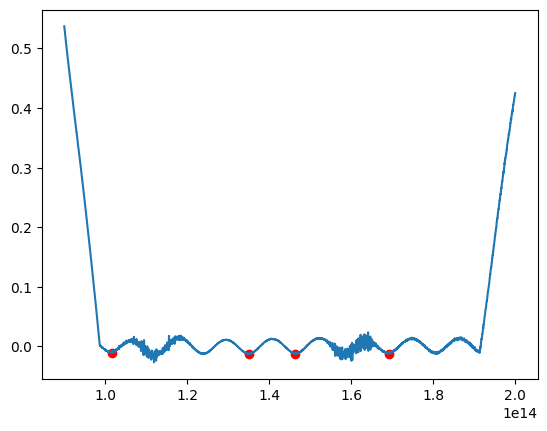

In [21]:
plt.plot(minima_J13_frequenz_20, minima_J13_absorption_20, 'ro')
plt.plot(frequenz_20_cut, J13_smoothed_out)